## 问题4数学建模过程

### 1. 问题描述

如果饲料加工厂允许部分加工窖不生产，请建立数学模型，给出混合加工方案，用尽量低的加工成本完成整个加工任务，同时要求平均能耗率超过80%的加工包尽量的多。

### 2. 数学模型

#### 变量定义

- **$x_{ij}$**：原料 $i$ 分配到加工窖 $j$ 的重量，其中 $i \in \{1, 2, \ldots, 16\}$，$j \in \{1, 2, \ldots, 9\}$。
- **$y_j$**：加工窖 $j$ 是否被使用，$y_j \in \{0, 1\}$，其中 $j \in \{1, 2, \ldots, 9\}$。
- **$z_j$**：加工窖 $j$ 的平均能耗率是否超过80%，$z_j \in \{0, 1\}$，其中 $j \in \{1, 2, \ldots, 9\}$。
- **$e_i$**：原料 $i$ 的能耗率。

#### 目标函数

最小化总加工成本，同时最大化平均能耗率超过80%的加工包数量。

目标函数表示为：

$$
\text{Minimize} \sum_{j=1}^{9} \left( C_j^{\text{fixed}} y_j + C_j^{\text{variable}} \sum_{i=1}^{16} x_{ij} \right) - \sum_{j=1}^{9} z_j
$$

其中，$C_j^{\text{fixed}}$ 是加工窖 $j$ 的固定成本，$C_j^{\text{variable}}$ 是加工窖 $j$ 的可变成本。

#### 约束条件

1. **每种原料必须分配到一个加工窖中**：

$$
\sum_{j=1}^{9} x_{ij} = w_i \quad \forall i \in \{1, 2, \ldots, 16\}
$$

其中，$w_i$ 表示原料 $i$ 的总重量。

2. **每个加工窖的重量必须在限定范围内（仅当加工窖被使用时）**：

$$
S_j^{\min} y_j \leq \sum_{i=1}^{16} x_{ij} \leq S_j^{\max} y_j \quad \forall j \in \{1, 2, \ldots, 9\}
$$

其中，$S_j^{\min}$ 和 $S_j^{\max}$ 分别为加工窖 $j$ 的最小和最大重量。

3. **辅助变量 $z_j$ 的约束，用于判断加工包的平均能耗率是否超过80%**：

$$
\sum_{i=1}^{16} x_{ij} e_i \geq 0.80 \sum_{i=1}^{16} x_{ij} - M (1 - z_j) \quad \forall j \in \{1, 2, \ldots, 9\}
$$

$$
\sum_{i=1}^{16} x_{ij} e_i \leq 0.80 \sum_{i=1}^{16} x_{ij} + M z_j \quad \forall j \in \{1, 2, \ldots, 9\}
$$

其中，$e_i$ 为原料 $i$ 的能耗率，$M$ 是一个足够大的常数。

4. **如果加工窖不被使用，其能耗率变量 $z_j$ 也必须为0**：

$$
z_j \leq y_j \quad \forall j \in \{1, 2, \ldots, 9\}
$$

### 3. 数学表达式详解

1. **变量定义**：
    - $x_{ij}$ 表示原料 $i$ 分配到加工窖 $j$ 的重量。
    - $y_j$ 表示加工窖 $j$ 是否被使用。
    - $z_j$ 表示加工窖 $j$ 的平均能耗率是否超过80%。
    - $e_i$ 表示原料 $i$ 的能耗率。
    - $w_i$ 表示原料 $i$ 的总重量。

2. **目标函数**：
    - 最小化总加工成本，同时最大化平均能耗率超过80%的加工包数量：
      $$
      \text{Minimize} \sum_{j=1}^{9} \left( C_j^{\text{fixed}} y_j + C_j^{\text{variable}} \sum_{i=1}^{16} x_{ij} \right) - \sum_{j=1}^{9} z_j
      $$

3. **约束条件**：
    - 每种原料必须分配到一个加工窖中：
      $$
      \sum_{j=1}^{9} x_{ij} = w_i \quad \forall i \in \{1, 2, \ldots, 16\}
      $$
    - 每个加工窖的重量必须在限定范围内（仅当加工窖被使用时）：
      $$
      S_j^{\min} y_j \leq \sum_{i=1}^{16} x_{ij} \leq S_j^{\max} y_j \quad \forall j
      $$
    - 判断加工包的平均能耗率是否超过80%：
      $$
      \sum_{i=1}^{16} x_{ij} e_i \geq 0.80 \sum_{i=1}^{16} x_{ij} - M (1 - z_j) \quad \forall j
      $$
      $$
      \sum_{i=1}^{16} x_{ij} e_i \leq 0.80 \sum_{i=1}^{16} x_{ij} + M z_j \quad \forall j
      $$
    - 如果加工窖不被使用，其能耗率变量 $z_j$ 也必须为0：
      $$
      z_j \leq y_j \quad \forall j
      $$

In [1]:
import numpy as np
import pandas as pd
import pulp
import warnings
warnings.filterwarnings("ignore", category=UserWarning, message=".*Glyph.*")

In [2]:
# 原料数据
raw_data = {
    '品种代码': list(range(1, 17)),
    '总重量千克': [300, 500, 200, 500, 300, 400, 300, 300, 400, 600, 100, 600, 500, 400, 300, 300],
    '效能率': [0.88, 0.60, 0.93, 0.90, 0.90, 0.78, 0.70, 0.83, 0.95, 0.87, 0.65, 0.75, 0.80, 0.68, 0.87, 0.83],
    '位点基因序列': [
        ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j'],
        ['a', 'b', 'c', 'd', 'e', 'o', 'p', 'k', 'l', 'm'],
        ['f', 'g', 'h', 'a', 'j', 'o', 'p', 'k', 'l', 'm'],
        ['f', 'g', 'h', 'i', 'j', 'l', 'p', 'f', 'o', 'p'],
        ['f', 'b', 'h', 'd', 'e', 'o', 'p', 'a', 'o', 'z'],
        ['r', 'm', 't', 'u', 'q', 'f', 'g', 'a', 'f', 'z'],
        ['r', 's', 't', 'u', 'k', 'f', 'g', 'h', 'f', 'c'],
        ['r', 's', 't', 'u', 'a', 'b', 'h', 'i', 'j', 'c'],
        ['c', 's', 'a', 'f', 'v', 'w', 'a', 'i', 'j', 'c'],
        ['b', 'm', 'n', 'i', 'a', 'z', 'h', 'f', 'o', 'z'],
        ['m', 'a', 'm', 'e', 'a', 'z', 'a', 'b', 'a', 'b'],
        ['m', 'c', 'm', 'e', 'x', 'h', 'a', 'b', 'n', 'a'],
        ['b', 'a', 'n', 'y', 'c', 'g', 'm', 'b', 'm', 'b'],
        ['m', 'c', 'm', 'y', 'x', 'g', 'm', 'b', 'n', 'b'],
        ['b', 'x', 'n', 'i', 'c', 'l', 'b', 'c', 'm', 'p'],
        ['c', 'c', 'a', 'f', 'x', 'h', 'b', 'c', 'm', 'j']
    ]
}

weights = raw_data['总重量千克']
efficiency = raw_data['效能率']
genes = raw_data['位点基因序列']

# 加工窖信息
silos = [
    {"id": 1, "min_weight": 300, "max_weight": 600, "fixed_cost": 400, "variable_cost": 2},
    {"id": 2, "min_weight": 300, "max_weight": 600, "fixed_cost": 400, "variable_cost": 2},
    {"id": 3, "min_weight": 300, "max_weight": 600, "fixed_cost": 400, "variable_cost": 2},
    {"id": 4, "min_weight": 600, "max_weight": 900, "fixed_cost": 500, "variable_cost": 1.8},
    {"id": 5, "min_weight": 600, "max_weight": 900, "fixed_cost": 500, "variable_cost": 1.8},
    {"id": 6, "min_weight": 600, "max_weight": 900, "fixed_cost": 500, "variable_cost": 1.8},
    {"id": 7, "min_weight": 900, "max_weight": 1200, "fixed_cost": 600, "variable_cost": 1.6},
    {"id": 8, "min_weight": 900, "max_weight": 1200, "fixed_cost": 600, "variable_cost": 1.6},
    {"id": 9, "min_weight": 900, "max_weight": 1200, "fixed_cost": 600, "variable_cost": 1.6}
]

In [3]:
# 创建优化问题
prob = pulp.LpProblem("Minimize_Cost", pulp.LpMinimize)

# 决策变量
x = pulp.LpVariable.dicts("x", ((i, j) for i in range(1, 17) for j in range(1, 10)), cat='Continuous', lowBound=0)
y = pulp.LpVariable.dicts("y", (j for j in range(1, 10)), cat='Binary')  # 表示加工窖是否被使用
z = pulp.LpVariable.dicts("z", (j for j in range(1, 10)), cat='Binary')  # 表示能耗率是否超过80%

# 定义大M
M = 1000000

# 目标函数：最小化总加工成本，同时最大化平均能耗率超过80%的加工包数量
prob += pulp.lpSum(silos[j-1]["fixed_cost"] * y[j] + silos[j-1]["variable_cost"] * pulp.lpSum(x[i, j] for i in range(1, 17)) for j in range(1, 10)) - pulp.lpSum(z[j] for j in range(1, 10))

# 约束条件
# 1. 每种原料必须分配到一个加工窖中
for i in range(1, 17):
    prob += pulp.lpSum(x[i, j] for j in range(1, 10)) == weights[i-1]

# 2. 每个加工窖的重量必须在限定范围内（仅当加工窖被使用时）
for j in range(1, 10):
    prob += pulp.lpSum(x[i, j] for i in range(1, 17)) <= silos[j-1]["max_weight"] * y[j]
    prob += pulp.lpSum(x[i, j] for i in range(1, 17)) >= silos[j-1]["min_weight"] * y[j]

# 3. 辅助变量z[j]的约束，用于判断加工包的平均能耗率是否超过80%
for j in range(1, 10):
    prob += pulp.lpSum(x[i, j] * efficiency[i-1] for i in range(1, 17)) - 0.80 * pulp.lpSum(x[i, j] for i in range(1, 17)) >= -M * (1 - z[j])
    prob += pulp.lpSum(x[i, j] * efficiency[i-1] for i in range(1, 17)) - 0.80 * pulp.lpSum(x[i, j] for i in range(1, 17)) <= M * z[j]

# 4. 如果加工窖不被使用，其能耗率变量z[j]也必须为0
for j in range(1, 10):
    prob += z[j] <= y[j]

# 求解问题
prob.solve()

# 输出结果
solution = np.zeros((16, 9))
efficiency_results = []
used_silos = []

for j in range(1, 10):
    if pulp.value(y[j]) == 1:
        used_silos.append(j)
    silo_weight = sum(pulp.value(x[i, j]) for i in range(1, 17))
    if silo_weight > 0:
        silo_efficiency = sum(pulp.value(x[i, j]) * efficiency[i-1] for i in range(1, 17)) / silo_weight
    else:
        silo_efficiency = 0
    efficiency_results.append(silo_efficiency)
    for i in range(1, 17):
        solution[i-1, j-1] = pulp.value(x[i, j])

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/yooky/anaconda3/lib/python3.11/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/ng/h1_4zcsj2qq895j6xpxvjyqh0000gn/T/d5941b490e0441c8bba9fdb2aa663899-pulp.mps -timeMode elapsed -branch -printingOptions all -solution /var/folders/ng/h1_4zcsj2qq895j6xpxvjyqh0000gn/T/d5941b490e0441c8bba9fdb2aa663899-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 66 COLUMNS
At line 1039 RHS
At line 1101 BOUNDS
At line 1120 ENDATA
Problem MODEL has 61 rows, 162 columns and 756 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 13207.7 - 0.00 seconds
Cgl0004I processed model has 52 rows, 162 columns (18 integer (18 of which binary)) and 612 elements
Cbc0038I Initial state - 4 integers unsatisfied sum - 0.666667
Cbc0038I Pass   1: suminf.    0.00000 (0) obj. 13434 iterations 23
Cbc0038I Solution found 

In [4]:
# 生成表4
table4_weights = pd.DataFrame(solution, columns=[f"加工窖{j}" for j in range(1, 10)], index=[f"原料{i}" for i in range(1, 17)])
table4_efficiency = pd.DataFrame(efficiency_results, columns=["能耗率"], index=[f"加工窖{j}" for j in range(1, 10)])
table4 = pd.concat([table4_weights, table4_efficiency.T], axis=0)

# 保留两位小数
table4 = table4.applymap(lambda x: f"{x:.2f}")

# 保存结果并显示
table4.T.to_csv('问题4结果.csv', index_label='加工窖')
print("表4 问题4的结果（每个加工窖所含每种加工原料的重量，千克）")
print(table4.T)

表4 问题4的结果（每个加工窖所含每种加工原料的重量，千克）
         原料1     原料2     原料3     原料4     原料5     原料6     原料7     原料8     原料9  \
加工窖1    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00   
加工窖2    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00   
加工窖3    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00   
加工窖4    0.00    0.00    0.00    0.00  300.00  302.78  263.24    0.00    0.00   
加工窖5    0.00  133.33    0.00  266.67    0.00    0.00    0.00    0.00    0.00   
加工窖6    0.00    0.00    0.00    0.00    0.00   97.22    0.00    0.00    0.00   
加工窖7    0.00  141.67  200.00  233.33    0.00    0.00    0.00    0.00    0.00   
加工窖8  300.00  225.00    0.00    0.00    0.00    0.00   36.76  300.00  338.24   
加工窖9    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00   61.76   

        原料10    原料11    原料12    原料13    原料14    原料15    原料16   能耗率  
加工窖1    0.00    0.00    0.00    0.00    0.00    0.00    0.00  0.00  
加工窖2    0.00    0.00    0.00  

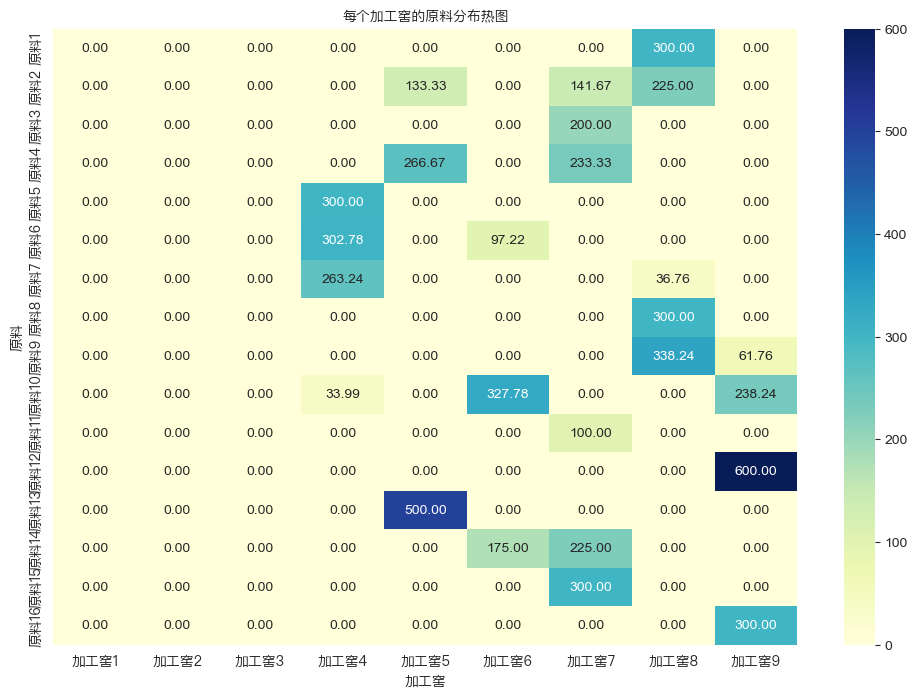

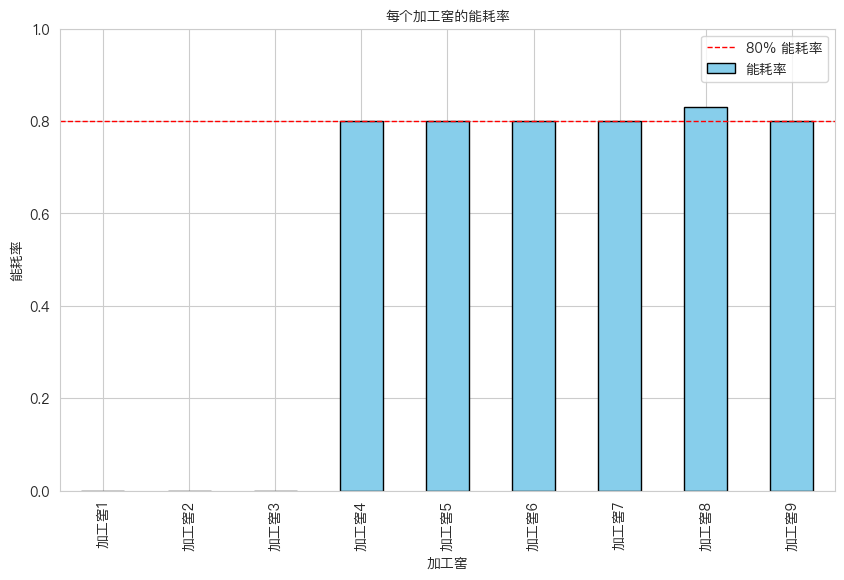

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.font_manager import FontProperties

font_path = '/System/Library/Fonts/PingFang.ttc'
my_font = FontProperties(fname=font_path)

results = pd.read_csv('问题4结果.csv', index_col='加工窖')

# 将原料重量部分和能耗率部分分开
weights = results.drop(columns=["能耗率"])
efficiencies = results["能耗率"]

# 绘制每个加工窖的原料分布热图
plt.figure(figsize=(12, 8))
sns.heatmap(weights.T, annot=True, fmt=".2f", cmap="YlGnBu", cbar=True)
plt.title('每个加工窖的原料分布热图', fontproperties=my_font)
plt.xlabel('加工窖', fontproperties=my_font)
plt.ylabel('原料', fontproperties=my_font)
plt.xticks(fontproperties=my_font)
plt.yticks(fontproperties=my_font)
plt.show()

# 绘制每个加工窖的能耗率
plt.figure(figsize=(10, 6))
efficiencies.plot(kind='bar', color='skyblue', edgecolor='black')
plt.axhline(y=0.80, color='red', linestyle='--', linewidth=1, label='80% 能耗率')
plt.title('每个加工窖的能耗率', fontproperties=my_font)
plt.xlabel('加工窖', fontproperties=my_font)
plt.ylabel('能耗率', fontproperties=my_font)
plt.xticks(fontproperties=my_font)
plt.yticks(fontproperties=my_font)
plt.ylim(0, 1)
plt.legend(prop=my_font)
plt.show()